In [3]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

def create_connection(db_file):

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

#导入数据库
database = '/kaggle/input/database/bojindataset.db'
conn = create_connection(database)
cur = conn.cursor()

## 名称-->代码

In [4]:
def select_jjdm(jjmc):  # by 基金全/简称 找 基金代码
    sql ='''select 基金代码 from 基金基本信息 where 基金全称=? or 基金简称=?'''
    cur.execute(sql, (jjmc,jjmc))
    jjdm = cur.fetchall()
    return jjdm[0][0]
select_jjdm("诺安鸿鑫混合A")

'000066'

In [22]:
#找到基金代码后，查询其他信息
def select_jjjbxx(jjdm):  #by 基金代码 找 基金基本信息
    sql ='''select * from 基金基本信息 where 基金代码=?'''
    cur.execute(sql, [jjdm])
    jjjbxx = cur.fetchall()
    jjjbxx = {
        "基金代码":jjjbxx[0][0],
        "基金全称":jjjbxx[0][1],
        "基金简称":jjjbxx[0][2],
        "管理人":jjjbxx[0][3],
        "托管人":jjjbxx[0][4],
        "基金类型":jjjbxx[0][5],
        "成立日期":jjjbxx[0][6],
        "到期日期":jjjbxx[0][7],
        "管理费率":jjjbxx[0][8],
        "托管费率":jjjbxx[0][9]
        
    }
    return jjjbxx


{'基金代码': '000006',
 '基金全称': '西部利得量化成长混合型发起式证券投资基金A类',
 '基金简称': '西部利得量化成长混合A',
 '管理人': '西部利得基金管理有限公司',
 '托管人': '中国农业银行股份有限公司',
 '基金类型': '混合型',
 '成立日期': '20190319',
 '到期日期': '30001231',
 '管理费率': '1.2%',
 '托管费率': '0.1%'}

       基金代码      交易日期    单位净值  复权单位净值  累计单位净值          资产净值
0    000961  20190102  0.9006  0.9006  0.9006  1.922017e+09
1    000961  20190103  0.8993  0.8993  0.8993  1.922017e+09
2    000961  20190104  0.9193  0.9193  0.9193  1.922017e+09
3    000961  20190107  0.9245  0.9245  0.9245  1.922017e+09
4    000961  20190108  0.9226  0.9226  0.9226  1.922017e+09
..      ...       ...     ...     ...     ...           ...
727  000961  20211227  1.5763  1.5763  1.5763  2.917319e+09
728  000961  20211228  1.5874  1.5874  1.5874  2.917319e+09
729  000961  20211229  1.5650  1.5650  1.5650  2.917319e+09
730  000961  20211230  1.5766  1.5766  1.5766  2.917319e+09
731  000961  20211231  1.5822  1.5822  1.5822  2.767828e+09

[732 rows x 6 columns]


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

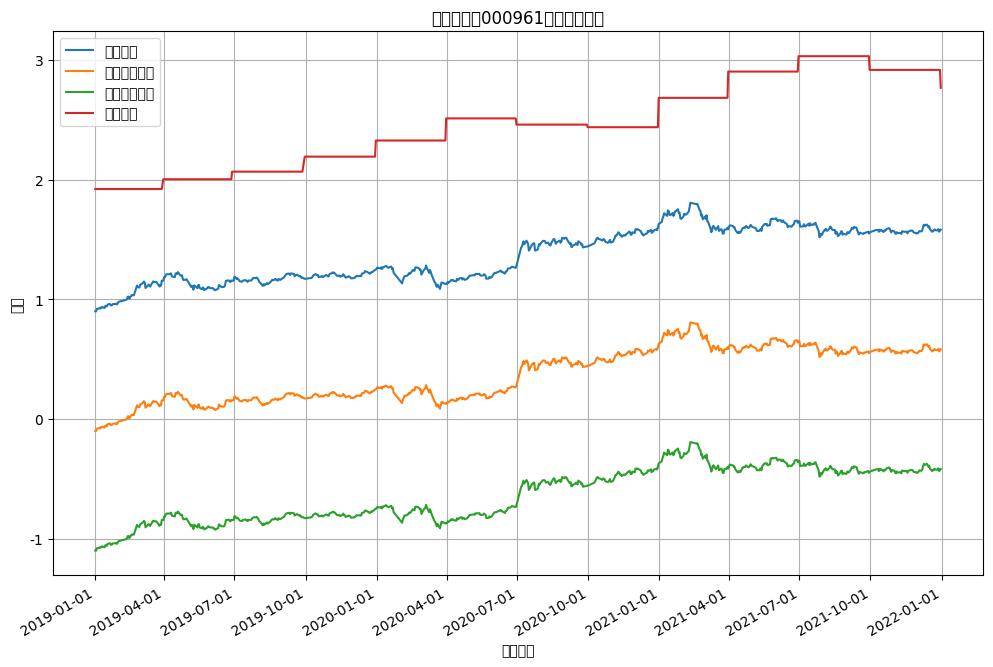

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def select_jjrhq(jjdm):   #by 基金代码 找 基金日行情,按日期排序
    sql ='''select * from 基金日行情表 where 基金代码=?'''
    cur.execute(sql, [jjdm])
    jjrhq = cur.fetchall()
    # 创建一个dataframe
    df = pd.DataFrame(columns=['基金代码', '交易日期', '单位净值', '复权单位净值', '累计单位净值', '资产净值'])
    i=0
    for row in jjrhq:
        #print(row)
        df.loc[i] = row
        i=i+1
    
    df=df.sort_values(by=[ '交易日期'],ascending=True).reset_index(drop=True)
    print(df)
    
    df['交易日期'] = pd.to_datetime(df['交易日期'], format='%Y%m%d')
    
    # 绘图
    plt.figure(figsize=(12, 8))

    plt.plot(df['交易日期'], df['单位净值'], label='单位净值')
    plt.plot(df['交易日期'], df['复权单位净值']-1, label='复权单位净值') # 10000-18000
    plt.plot(df['交易日期'], df['累计单位净值']-2, label='累计单位净值')
    plt.plot(df['交易日期'], df['资产净值']/1000000000, label='资产净值')

    plt.xlabel('交易日期')
    plt.ylabel('净值')
    plt.title(f'基金代码为{jjdm}的基金日行情')
    plt.legend()

    # 设置x轴日期格式
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记

    plt.grid(True)
    plt.show()

    return plt.show()

select_jjrhq(select_jjdm("天弘沪深300交易型开放式指数证券投资基金联接基金A类"))

## 基金规模变动

      基金代码     基金简称                 公告日期                 截止日期    报告期期初基金总份额  \
0   003126  长信易进混合A  2019-04-22 00:00:00  2019-03-31 00:00:00  1.347349e+05   
1   003126  长信易进混合A  2019-07-18 00:00:00  2019-06-30 00:00:00  1.456221e+05   
2   003126  长信易进混合A  2019-10-23 00:00:00  2019-09-30 00:00:00  9.095851e+04   
3   003126  长信易进混合A  2020-01-17 00:00:00  2019-12-31 00:00:00  8.576488e+04   
4   003126  长信易进混合A  2020-04-22 00:00:00  2020-03-31 00:00:00  2.483803e+04   
5   003126  长信易进混合A  2020-07-21 00:00:00  2020-06-30 00:00:00  1.872851e+04   
6   003126  长信易进混合A  2020-10-28 00:00:00  2020-09-30 00:00:00  1.955128e+04   
7   003126  长信易进混合A  2021-01-22 00:00:00  2020-12-31 00:00:00  2.606430e+08   
8   003126  长信易进混合A  2021-04-21 00:00:00  2021-03-31 00:00:00  2.849482e+08   
9   003126  长信易进混合A  2021-07-21 00:00:00  2021-06-30 00:00:00  2.655937e+08   
10  003126  长信易进混合A  2021-10-27 00:00:00  2021-09-30 00:00:00  2.374017e+08   
11  003126  长信易进混合A  2022-01-24 00:00:00  2021-12-31

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

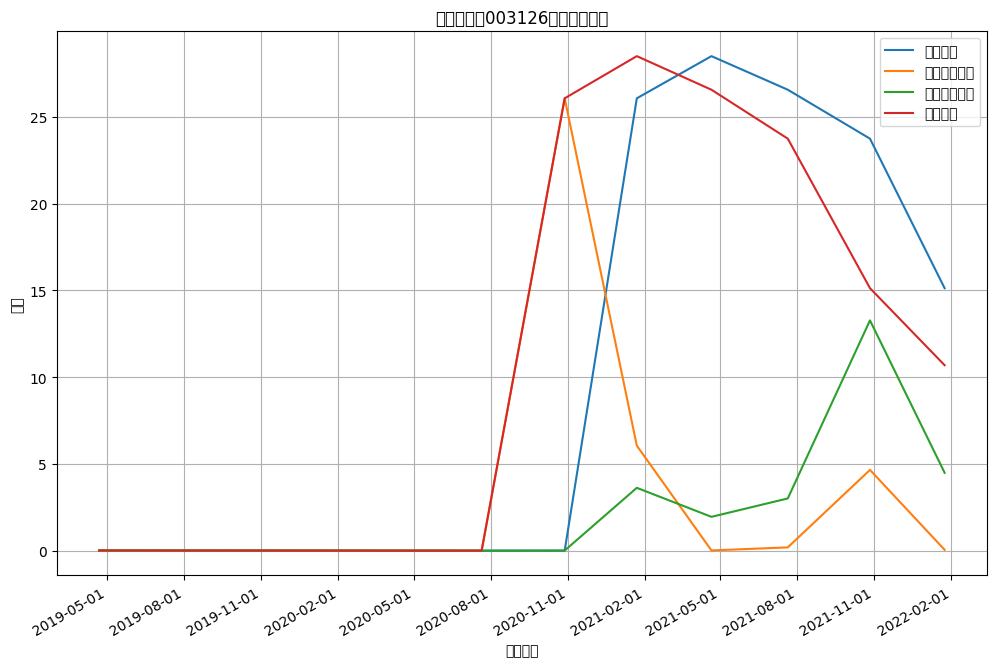

In [12]:
def select_jjgmbd(jjdm):  # by 基金代码 找基金规模变动
    sql ='''select * from 基金规模变动表 where 基金代码=?'''
    cur.execute(sql, [jjdm])
    jjgmbd = cur.fetchall()
    # 创建一个dataframe
    df = pd.DataFrame(columns=['基金代码','基金简称','公告日期', '截止日期','报告期期初基金总份额','报告期基金总申购份额','报告期基金总赎回份额','报告期期末基金总份额','定期报告所属年度','报告类型'])
    i=0
    for row in jjgmbd:
        #print(row)
        df.loc[i] = row
        i=i+1
    
    
    df=df.sort_values(by=['公告日期'],ascending=True).reset_index(drop=True)
    print(df)
    df['公告日期'] = pd.to_datetime(df['公告日期'], format='%Y-%m-%d %H:%M:%S')
    
    # 绘图
    plt.figure(figsize=(12, 8))

    plt.plot(df['公告日期'], df['报告期期初基金总份额']/10000000, label='单位净值')
    plt.plot(df['公告日期'], df['报告期基金总申购份额']/10000000, label='复权单位净值') # 10000-18000
    plt.plot(df['公告日期'], df['报告期基金总赎回份额']/10000000, label='累计单位净值')
    plt.plot(df['公告日期'], df['报告期期末基金总份额']/10000000, label='资产净值')

    plt.xlabel('交易日期')
    plt.ylabel('净值')
    plt.title(f'基金代码为{jjdm}的基金规模变动')
    plt.legend()

    # 设置x轴日期格式
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记

    plt.grid(True)
    plt.show()

    return plt.show()
select_jjgmbd("003126")

## 基金份额持有人结构

     基金代码         基金简称                 公告日期                 截止日期  \
0  000006  西部利得量化成长混合A  2019-08-24 00:00:00  2019-06-30 00:00:00   
1  000006  西部利得量化成长混合A  2020-03-31 00:00:00  2019-12-31 00:00:00   
2  000006  西部利得量化成长混合A  2020-08-31 00:00:00  2020-06-30 00:00:00   
3  000006  西部利得量化成长混合A  2021-03-30 00:00:00  2020-12-31 00:00:00   
4  000006  西部利得量化成长混合A  2021-08-30 00:00:00  2021-06-30 00:00:00   
5  000006  西部利得量化成长混合A  2022-03-30 00:00:00  2021-12-31 00:00:00   

   机构投资者持有的基金份额  机构投资者持有的基金份额占比  个人投资者持有的基金份额  个人投资者持有的基金份额占比  定期报告所属年度  报告类型  
0  1.000060e+07            7.24  1.280870e+08           92.76      2019  中期报告  
1  7.630720e+07           66.39  3.863356e+07           33.61      2019  年度报告  
2  2.177502e+08           85.82  3.597065e+07           14.18      2020  中期报告  
3  4.712427e+08           85.01  8.309885e+07           14.99      2020  年度报告  
4  5.156825e+08           73.80  1.830718e+08           26.20      2021  中期报告  
5  5.439103e+08           62.43  3.273755e+

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

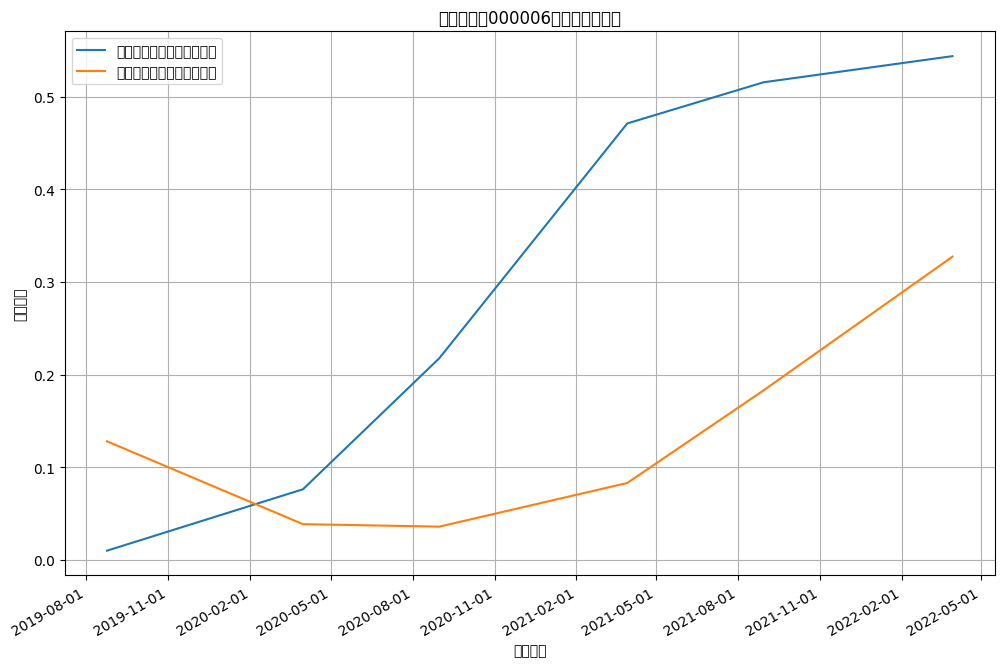

In [6]:
def select_cyrjg(jjdm):   # by 基金代码 找 基金份额持有人结构
    sql ='''select * from 基金份额持有人结构 where 基金代码=?'''
    cur.execute(sql, [jjdm])
    cyrjg = cur.fetchall()
    # 创建一个dataframe
    df = pd.DataFrame(columns=['基金代码','基金简称','公告日期', '截止日期','机构投资者持有的基金份额','机构投资者持有的基金份额占比','个人投资者持有的基金份额','个人投资者持有的基金份额占比','定期报告所属年度','报告类型'])
    i=0
    for row in cyrjg:
        #print(row)
        df.loc[i] = row
        i=i+1
    print(df)
    
    df=df.sort_values(by=['公告日期'],ascending=True).reset_index(drop=True)
    print(df)
    
    df['公告日期'] = pd.to_datetime(df['公告日期'], format='%Y-%m-%d %H:%M:%S')
    # 绘图
    plt.figure(figsize=(12, 8))

    plt.plot(df['公告日期'], df['机构投资者持有的基金份额']/1000000000, label='机构投资者持有的基金份额')
    plt.plot(df['公告日期'], df['个人投资者持有的基金份额']/1000000000, label='个人投资者持有的基金份额') 


    plt.xlabel('公告日期')
    plt.ylabel('基金份额')
    plt.title(f'基金代码为{jjdm}的基金份额持有人结构')
    plt.legend()

    # 设置x轴日期格式
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记

    plt.grid(True)
    plt.show()

    return plt.show()
select_cyrjg("000006")

西部利得量化成长混合A 代码(000006)的信息如下：
       基金代码      交易日期    单位净值  复权单位净值  累计单位净值          资产净值
0    000006  20190319  1.0000  1.0000  1.0000  1.778563e+08
1    000006  20190322  1.0000  1.0000  1.0000  1.778635e+08
2    000006  20190325  1.0001  1.0001  1.0001  1.778635e+08
3    000006  20190326  1.0002  1.0002  1.0002  1.778635e+08
4    000006  20190327  1.0002  1.0002  1.0002  1.778635e+08
..      ...       ...     ...     ...     ...           ...
675  000006  20211227  2.2421  2.5907  2.5701  2.120854e+09
676  000006  20211228  2.2789  2.6332  2.6069  2.120854e+09
677  000006  20211229  2.2724  2.6257  2.6004  2.120854e+09
678  000006  20211230  2.2951  2.6520  2.6231  2.120854e+09
679  000006  20211231  2.3087  2.6677  2.6367  2.011551e+09

[680 rows x 6 columns]


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

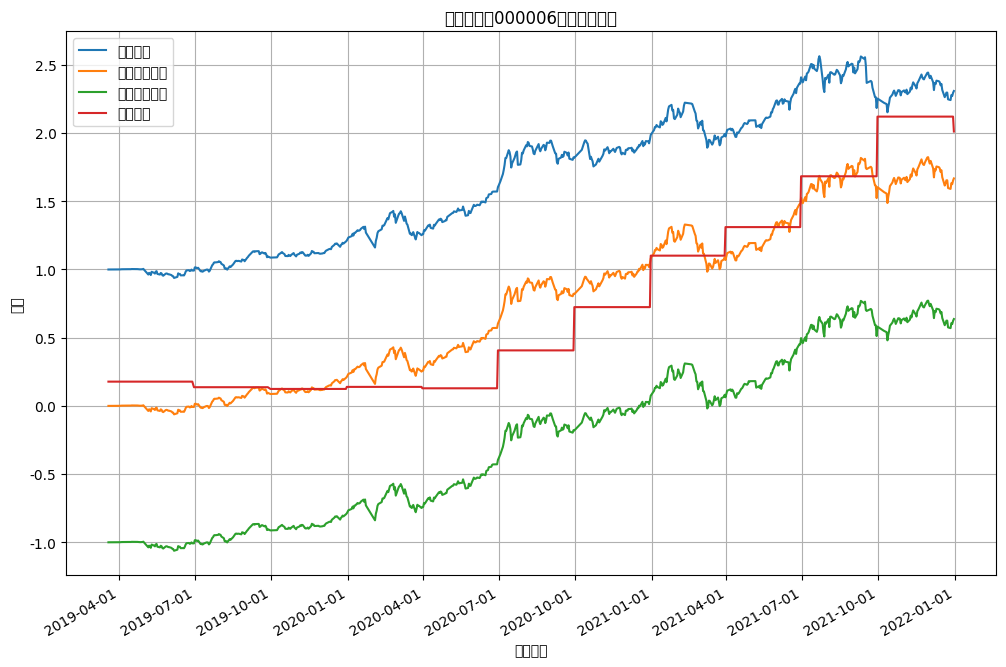

      基金代码         基金简称                 公告日期                 截止日期  \
0   000006  西部利得量化成长混合A  2019-07-19 00:00:00  2019-06-30 00:00:00   
1   000006  西部利得量化成长混合A  2019-10-24 00:00:00  2019-09-30 00:00:00   
2   000006  西部利得量化成长混合A  2020-01-17 00:00:00  2019-12-31 00:00:00   
3   000006  西部利得量化成长混合A  2020-04-22 00:00:00  2020-03-31 00:00:00   
4   000006  西部利得量化成长混合A  2020-07-21 00:00:00  2020-06-30 00:00:00   
5   000006  西部利得量化成长混合A  2020-10-28 00:00:00  2020-09-30 00:00:00   
6   000006  西部利得量化成长混合A  2021-01-21 00:00:00  2020-12-31 00:00:00   
7   000006  西部利得量化成长混合A  2021-04-20 00:00:00  2021-03-31 00:00:00   
8   000006  西部利得量化成长混合A  2021-07-20 00:00:00  2021-06-30 00:00:00   
9   000006  西部利得量化成长混合A  2021-10-26 00:00:00  2021-09-30 00:00:00   
10  000006  西部利得量化成长混合A  2022-01-21 00:00:00  2021-12-31 00:00:00   

      报告期期初基金总份额    报告期基金总申购份额    报告期基金总赎回份额    报告期期末基金总份额  定期报告所属年度    报告类型  
0   1.784141e+08  3.025027e+06  4.335149e+07  1.380876e+08      2019  基金定期报告  
1   1.380876e

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

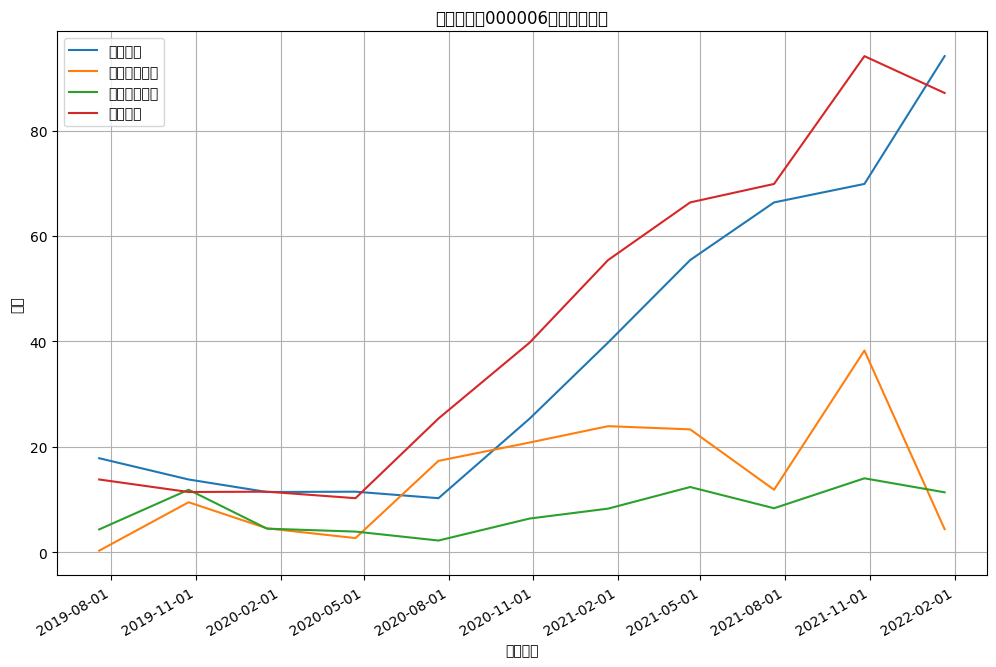

     基金代码         基金简称                 公告日期                 截止日期  \
0  000006  西部利得量化成长混合A  2019-08-24 00:00:00  2019-06-30 00:00:00   
1  000006  西部利得量化成长混合A  2020-03-31 00:00:00  2019-12-31 00:00:00   
2  000006  西部利得量化成长混合A  2020-08-31 00:00:00  2020-06-30 00:00:00   
3  000006  西部利得量化成长混合A  2021-03-30 00:00:00  2020-12-31 00:00:00   
4  000006  西部利得量化成长混合A  2021-08-30 00:00:00  2021-06-30 00:00:00   
5  000006  西部利得量化成长混合A  2022-03-30 00:00:00  2021-12-31 00:00:00   

   机构投资者持有的基金份额  机构投资者持有的基金份额占比  个人投资者持有的基金份额  个人投资者持有的基金份额占比  定期报告所属年度  报告类型  
0  1.000060e+07            7.24  1.280870e+08           92.76      2019  中期报告  
1  7.630720e+07           66.39  3.863356e+07           33.61      2019  年度报告  
2  2.177502e+08           85.82  3.597065e+07           14.18      2020  中期报告  
3  4.712427e+08           85.01  8.309885e+07           14.99      2020  年度报告  
4  5.156825e+08           73.80  1.830718e+08           26.20      2021  中期报告  
5  5.439103e+08           62.43  3.273755e+

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

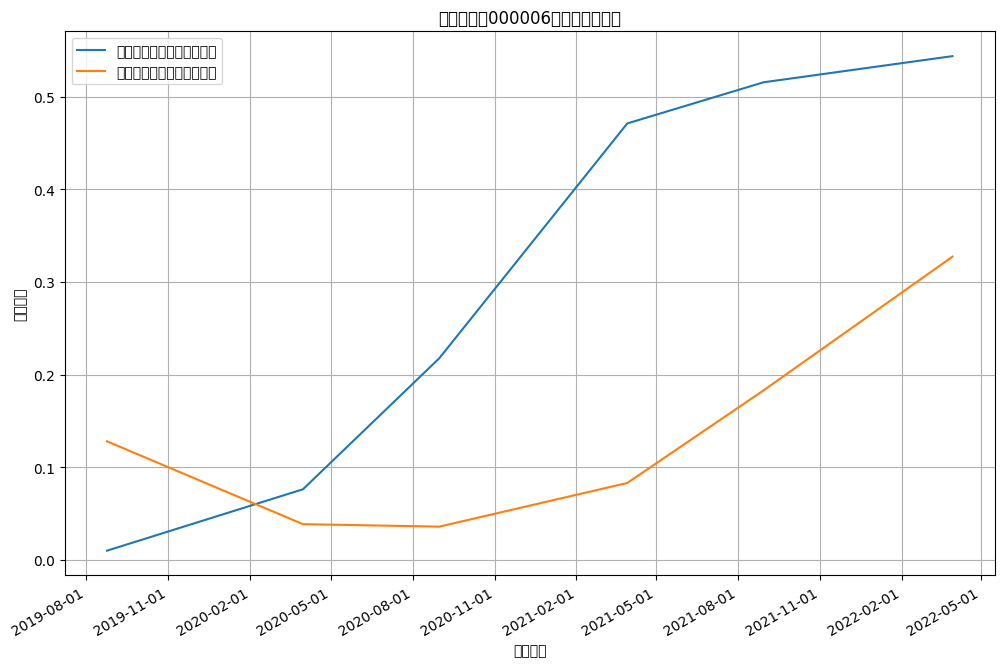

"{'基金代码': '000006', '基金全称': '西部利得量化成长混合型发起式证券投资基金A类', '基金简称': '西部利得量化成长混合A', '管理人': '西部利得基金管理有限公司', '托管人': '中国农业银行股份有限公司', '基金类型': '混合型', '成立日期': '20190319', '到期日期': '30001231', '管理费率': '1.2%', '托管费率': '0.1%'}/nNone/nNone/nNone"

In [24]:
import re

def is_fund_code(input_str):
    # 使用正则表达式判断输入是否为基金代码（数字或数字+字母的组合）
    return bool(re.match(r'^[a-zA-Z0-9]+$', input_str))

def process_input(input_str):
    if is_fund_code(input_str):
        jjdm = input_str
        # 这里可以添加处理基金代码的逻辑
    else:
        jjdm = select_jjdm(input_str)
        if jjdm:
            print(f"{input_str} 代码({jjdm})的信息如下：")
            # 这里可以添加处理基金代码的逻辑
        else:
            print(f"未找到基金名称 {input_str}")
    return f"{select_jjjbxx(jjdm)}/n{select_jjrhq(jjdm)}/n{select_jjgmbd(jjdm)}/n{select_cyrjg(jjdm)}"
    
process_input("西部利得量化成长混合A")
    